In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')
pd.set_option('display.max_columns', None) 

In [ ]:
credit_card_data = pd.read_csv ('E:\Python\Data\creditcard.csv')

**Data cleaning**

In [64]:
credit_card_data.shape

(284807, 31)

In [65]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [141]:
#Distribution legit and fraud
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_1140\1016539810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit_card_data, palette='Set1')


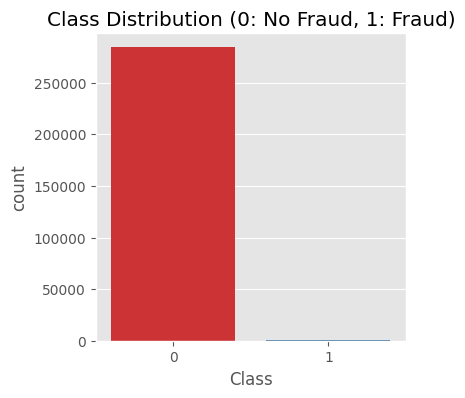

Class Distribution : Class
0    284315
1       492
Name: count, dtype: int64


In [142]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Class', data=credit_card_data)
sns.countplot(x='Class', data=credit_card_data, palette='Set1')
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()
class_count = credit_card_data['Class'].value_counts()
print (f"Class Distribution : { class_count}")

In [143]:
legit = credit_card_data [credit_card_data.Class ==0]
fraud = credit_card_data [credit_card_data.Class ==1]
print (legit.shape)
print (fraud.shape)

(284315, 31)
(492, 31)


In [71]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Compare value

In [73]:
credit_card_data.groupby ('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [74]:
#Number of fraud transactoion is 492


In [75]:
legit_sample = legit.sample(n=492)

In [76]:
#concat two dataframes
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [77]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3051,2613.0,-1.463178,1.538825,0.787465,-0.102192,-0.626390,-0.359723,-0.213734,1.087096,-0.768673,-0.320412,1.377076,0.955396,-0.298773,1.006827,0.360615,0.285244,0.054674,-0.272122,-0.171430,-0.029066,-0.081620,-0.407118,0.135313,0.192189,-0.237686,0.080362,0.135568,0.032380,9.99,0
233993,147784.0,-1.936274,-0.500022,-0.561178,0.128815,0.806175,-0.508344,-0.000841,0.467700,0.831187,-1.118740,-1.585150,-0.303923,-0.758301,-1.515588,-1.312455,-0.011182,1.165743,0.405704,-0.050915,-0.303459,0.109765,0.811761,0.262718,0.504569,0.478399,0.829386,-0.060917,0.150357,63.00,0
181854,125146.0,1.894628,-1.666562,-0.825716,-1.194279,-0.708951,1.013076,-1.324448,0.265279,0.187581,0.778920,-0.367951,-0.132019,0.734844,-0.608498,-0.113145,2.134746,-0.802455,-0.031958,1.155285,0.398660,0.277407,0.454594,-0.018584,-0.677859,-0.324453,-0.239450,-0.001046,-0.024518,168.40,0
193820,130308.0,1.117259,-3.333379,-1.410966,-1.440935,-1.069758,1.900112,-1.022111,0.453438,-1.124253,1.248192,0.817708,-0.050791,-0.134500,-0.195269,-0.299780,-1.087798,1.149732,-1.119576,-0.702239,0.521094,-0.158497,-1.079258,0.118822,-0.797943,-0.988885,-0.554417,-0.023210,0.032694,532.95,0
75648,56179.0,0.741315,-1.888548,-1.914752,-1.323688,1.259324,3.330370,-0.306384,0.603934,-0.981734,0.508840,-0.499007,-0.166868,0.219016,0.235818,0.185823,-1.424186,-0.177274,1.110175,-0.210117,0.385414,-0.276237,-1.184030,-0.369550,1.070932,0.457881,1.067273,-0.136530,0.056191,379.48,0


In [78]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [79]:
new_dataset ['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [80]:
new_dataset.groupby ('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91641.713415,-0.118381,-0.050054,0.043150,-0.095571,-0.042277,0.041180,-0.096925,0.119596,0.014359,0.024006,-0.058210,0.033582,0.089633,0.041401,-0.085868,0.088401,-0.059713,0.002098,-0.002518,-0.044062,0.022511,-0.079530,-0.023151,-0.02433,-0.011736,0.036459,-0.026888,-0.025236,85.240528
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting data into feature and target

In [81]:
X= new_dataset.drop(columns= 'Class', axis =1)
Y= new_dataset['Class']

In [82]:
print (X)

            Time        V1        V2        V3        V4        V5        V6  \
3051      2613.0 -1.463178  1.538825  0.787465 -0.102192 -0.626390 -0.359723   
233993  147784.0 -1.936274 -0.500022 -0.561178  0.128815  0.806175 -0.508344   
181854  125146.0  1.894628 -1.666562 -0.825716 -1.194279 -0.708951  1.013076   
193820  130308.0  1.117259 -3.333379 -1.410966 -1.440935 -1.069758  1.900112   
75648    56179.0  0.741315 -1.888548 -1.914752 -1.323688  1.259324  3.330370   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [83]:
print (Y)

3051      0
233993    0
181854    0
193820    0
75648     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Traning and Testing Data

In [87]:
X_train, X_test, Y_train, y_test = train_test_split (X,Y,test_size=0.2,random_state= 2)

In [88]:
print (X.shape, X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [89]:
model = LogisticRegression()


In [ ]:
#training the logisticRegression Model with trainingdata
model.fit(X_train,Y_train)

Model Evaluation

Accuracy Score

In [94]:

#accuracy on trainingdata
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction, Y_train)

In [95]:
print ('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.951715374841169


In [98]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score (X_test_prediction, y_test)

In [99]:
print ('Accuracy on testing data :', testing_data_accuracy)

Accuracy on testing data : 0.9441624365482234


**Random Forest Model**

In [126]:
# Built a RF classifier
RF = RandomForestClassifier (n_estimators=100, random_state=2)
RF.fit (X_train,Y_train)
Y_pred = RF.predict (X_test)

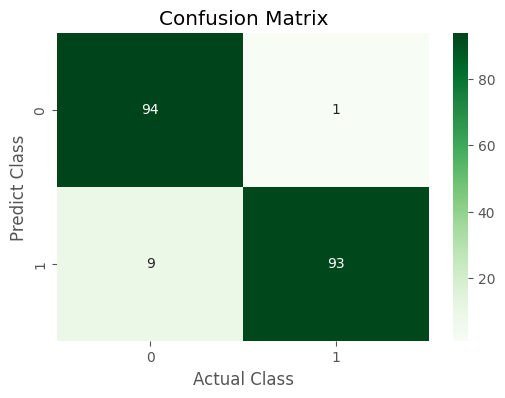

In [139]:
# Confusion Matrix
conf_matrix = confusion_matrix (y_test, Y_pred)
plt.figure (figsize = (6,4))
sns.heatmap (conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')
plt.title ('Confusion Matrix')
plt.xlabel ('Actual Class')
plt.ylabel ('Predict Class')
plt.show()